# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Определим, какие параметры влияют на стоимость квартиры.

Наши имеющиеся данные:
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
realty = pd.read_csv('/datasets/real_estate_data.csv', sep="\t")
realty.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Вывод

Пропуски имеются в столбцах 'ceiling_height', 'floors_total', 'living_area', 'is_apartment', 'kitchen_area', 'balcony', 'locality_name', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition'. 

Данные в столбце 'first_day_exposition' в неправильном формате.

Попробуем исправить это.

### Шаг 2. Предобработка данных

In [3]:
# предположим, что если в объявлении не указано наличие балкона, парка или пруда рядом, то их нет. 
# заполним пропуски нулевыми значениями

for i in ['balcony', 'parks_around3000', 'ponds_around3000']:
    realty[i] = realty[i].fillna(0)

In [4]:
# упорядочим названия населенных пунктов, убрав разнообразные характеристики - поселок, деревня и др.
realty['locality_name'] = realty['locality_name'].replace('поселок', 'посёлок', regex=True)
for i in ['городского типа ', 'деревня ', 'городской ', 'садовое', 'товарищество ', 'посёлок ', 'село ', 'садоводческое некоммерческое ', 'при ', 'коттеджный ', 'железнодорожной ', 'станции ']:
    realty['locality_name'] = realty['locality_name'].replace(i, '', regex=True)

In [5]:
# так как единственным крупным городом в списке является Питер, 
# то тем объявлениям, где не указано расстояние до пруда, парка, аэропорта или центра СПб, 
# можно присвоить значения, средние для конкретных населенных пунктов
for i in realty['locality_name'].unique():
    for j in ['parks_nearest', 'ponds_nearest', 'airports_nearest', 'cityCenters_nearest']:
        if i != 'Санкт-Петербург':
            realty.loc[realty['locality_name'] == i, j] =  realty.loc[realty['locality_name'] == i, j].fillna(realty[realty['locality_name'] == i][j].median())      

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [6]:
# переведем формат даты в правильный
realty['first_day_exposition'] = pd.to_datetime(realty['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [7]:
# заполним пропуски жилой площади, вычитая площадь кухни из общей площади
realty['living_area'] = realty['living_area'].fillna(realty['total_area'] - realty['kitchen_area'])
# заполним пропуски площади кухни, вычитая жилую площадь из общей площади
realty['kitchen_area'] = realty['kitchen_area'].fillna(realty['total_area'] - realty['living_area'])

### Шаг 3. Посчитайте и добавьте в таблицу

In [8]:
# подсчитаем цену квадратного метра
realty['price_m2'] = realty['last_price'] / realty['total_area']

In [9]:
# добавим столбцы с днем недели, месяцем и годом размещения объявления
realty['weekday'] = realty['first_day_exposition'].dt.weekday
realty['month'] = realty['first_day_exposition'].dt.month
realty['year'] = realty['first_day_exposition'].dt.year

In [10]:
# добавим столбец с характеристикой эатажа - первый, последний, другой
realty['floor_type'] = realty['floor'].where(realty['floor'] != realty['floors_total'], 'последний')
realty['floor_type'] = realty['floor_type'].where(realty['floor_type'] == 'последний', 'другой')
realty['floor_type'] = realty['floor_type'].where(realty['floor'] != 1, 'первый')

In [11]:
# подсчитаем соотношение жилой площади к общей
realty['living_to_total'] = realty['living_area'] / realty['total_area']
# подсчитаем соотношение площади кухни к общей
realty['kitchen_to_total'] = realty['kitchen_area'] / realty['total_area']

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

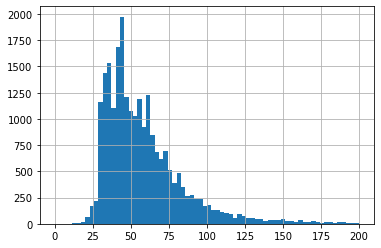

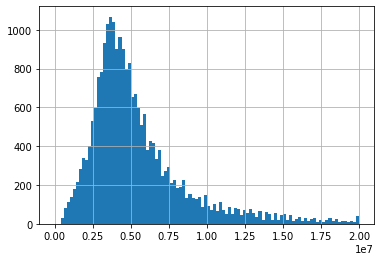

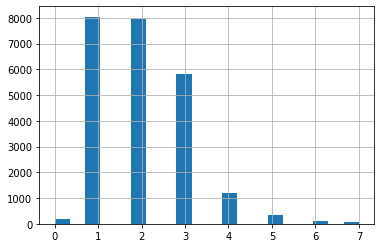

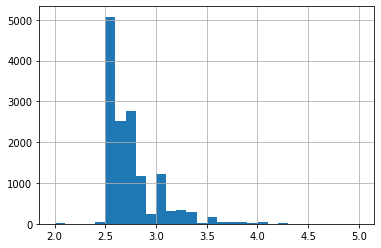

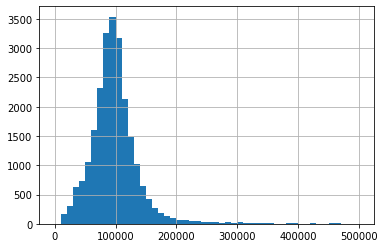

In [12]:
# создадим гистограммы с распределением общей площади, цены, количества комнат, высоты потолков и цены м2
realty['total_area'].hist(bins=70, range=(0, 200))
plt.show()
realty['last_price'].hist(bins=100, range=(0, 20000000))
plt.show()
realty['rooms'].hist(bins=20, range=(0, 7))
plt.show()
realty['ceiling_height'].hist(bins=30, range=(2, 5))
plt.show()
realty['price_m2'].hist(bins=50, range=(0, 500000))
plt.show()

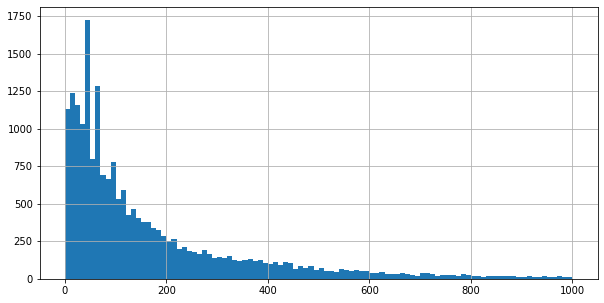

In [13]:
# создадим гистограмму распределения дней, в течение которых продавалась квартира
realty['days_exposition'].hist(bins=100, range=(0, 1000), figsize=(10,5))
plt.show()

In [14]:
print(realty['days_exposition'].mean()) # среднее количество дней продажи квартиры
print(realty['days_exposition'].median()) # медианное количество дней продажи квартиры

180.88863436982163
95.0


### Выводы
- можно считать, что если квартиру удалось продать быстрее, чем за 95 дней, то продажа оказалась быстрой.
- если же квартира продается больше года, то, судя по гистограмме, сделка затягивается

In [15]:
# подсчитаем корреляцию цены метра с площадью, количества комнат и расстоянием до центра, убрав супердорогие квартиры
# как мы видим из гистограммы, почти все квартиры стоят до 200 т.р. за м2.
good_realty = realty.query('price_m2 < 200000').copy()
for i in ['total_area', 'rooms', 'cityCenters_nearest']:
    print(good_realty['price_m2'].corr(good_realty[i]))

0.1307599402755475
-0.06628094738854641
-0.4146839323928256


### Вывод: 

если очистить таблицу от квартир премиум-класса, где на цену влияет не столько размер, сколько положение, дизайн и другие факторы, то цена квадратного метра будет слабо коррелировать с метражом, обратно коррелировать с количеством комнат и в большей степени обратно коррелировать с расстоянием до центра СПб.

-0.0072715040340115165
-0.001995473680878201
0.008516101077766075


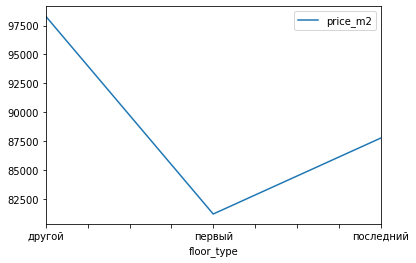

In [16]:
# рассчитаем корреляцию цены м2 от дня недели, месяца и года размещения объявления
for i in ['weekday', 'month', 'year']:
    print(realty['price_m2'].corr(realty[i]))

# посмотрим на зависимость цены м2 от типа этажа
realty_grouped = realty.pivot_table(index='floor_type', values='price_m2', aggfunc='median')
realty_grouped.plot()
plt.show()

### Выводы: 
- цена м2 не зависит от дня недели, месяца и года размещения объявления
- м2 первого этажа стоит заметно меньше чем м2 последнего этажа, а м2 последнего этажа - заметно меньше, чем непервого и непоследнего

In [17]:
# найдем 10 городов с наибольшим количеством объявлений
top10 = realty.pivot_table(index='locality_name', values='price_m2', aggfunc=['count', 'median']) 
top10.columns = ['count', 'median']
top10 = top10.sort_values(by='count', ascending=False).head(10)
top10.sort_values(by='median', ascending=False)

,count,median
locality_name,,
Санкт-Петербург,15721,104761.904762
Пушкин,369,100000.000000
Кудрово,472,95675.473579
Парголово,327,91642.857143
Мурино,590,86175.643522
Шушары,440,76876.172608
Колпино,338,74723.748474
Гатчина,307,67796.610169
Всеволожск,398,65789.473684


### Вывод:

Среди 10 популярных городов самые дорогие квартиры - в Питере, самые дешевые - в Выборге.

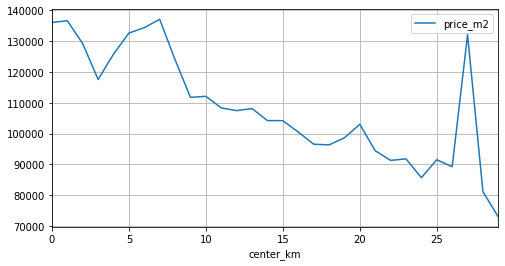

In [18]:
spb_realty = realty.query('locality_name == "Санкт-Петербург"').copy() # сделаем выборку питерских квартир
spb_realty = spb_realty.query('price_m2 < 300000').copy() # очистим выборку от супердорогих квартир
spb_realty.dropna(subset=['cityCenters_nearest'], inplace = True) # оставим только те, где указано расстояние до центра
spb_realty['center_km'] = round(spb_realty['cityCenters_nearest'] / 1000) # создадим столбец с расстоянием в км до центра
# создадим график зависимости цены от расстояния до центра
km_price = spb_realty.pivot_table(index = 'center_km', values = 'price_m2', aggfunc='mean')
km_price.plot(grid=True, figsize=(8, 4))
plt.show()

### Вывод:
Как мы видим, после отметки в 7 км квартиры начинают резко дешеветь. Это отметка и будет границей условного центра.

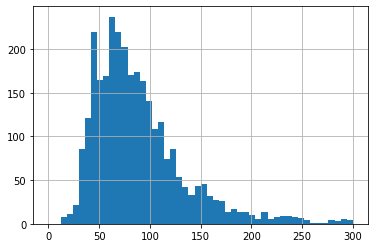

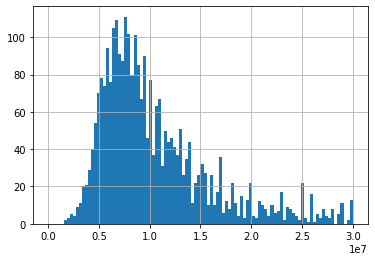

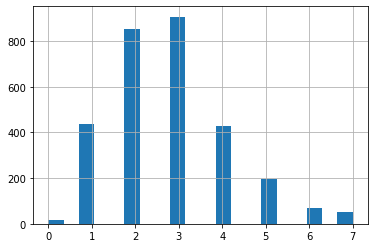

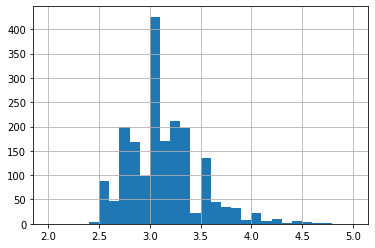

In [19]:
center_realty = spb_realty.query('center_km < 7').copy() # создадим выборку из квартир в центре СПб
# создадим гистограммы с распределением общей площади, цены, количества комнат и высоты потолков
center_realty['total_area'].hist(bins=50, range=(0, 300))
plt.show()
center_realty['last_price'].hist(bins=100, range=(0, 30000000))
plt.show()
center_realty['rooms'].hist(bins=20, range=(0, 7))
plt.show()
center_realty['ceiling_height'].hist(bins=30, range=(2, 5))
plt.show()

### Выводы: 
если перейти от общей выборки к центральной, то пик площади смещается с 45 к 65 м2, пик средней цены - от 3.5 млн к 6-7 млн, количество комнат увеличивается от 1-2 к 2-3, а пик высоты потолков смещается с 2,5 м к 3 м.

In [20]:
# рассчитаем корреляции цены м2 с числом комнат, этажом, удалённостью от центра и датой размещения объявления для центральных квартир
for i in ['rooms', 'floor', 'center_km', 'year']:
    print(center_realty['price_m2'].corr(center_realty[i]))
print()
# рассчитаем корреляции цены м2 с числом комнат, этажом, удалённостью от центра и датой размещения объявления для всех квартир СПб
for i in ['rooms', 'floor', 'center_km', 'year']:
    print(spb_realty['price_m2'].corr(spb_realty[i]))

-0.2024765465962149
0.19707148434427232
0.04465044936878041
0.08549812825786578

-0.07399135987535939
0.10494218242202338
-0.35325816361486845
0.07980961560508043


### Выводы
Как в общегородской, так и в центральной выборке цена м2 падает с увеличением размера квартиры, растет с вместе с этажом (никто не любит жить на первом этаже) и слегка растёт вместе с годом размещения объявления (чем позже, тем дороже).

Вместе с тем для центральной выборки близость к "абсолютному центру" Санкт-Петербурга почти неважна, поэтому центральные квартиры почти не зависят от этой характеристики, в то время как в целом по городу квартиры резко дешевеют по мере отдаления от центра.

### Шаг 5. Общий вывод

В ходе работы над проектом мы:
- заполнили пропущенные данные нулями в столбцах наличия балкона, парка или пруда поблизости
- восстановили пропущенные расстояния до центра, парка, пруда или аэропорта средними значениями по населенному пункту (крмое Санкт-Петербурга, т.к. тот является мегаполисом)
- восстановили данные жилой площади и площади кухни по имеющимся показателям общей площади
- перевели формат даты в корректный
- подсчитали цену м2 для каждой квартиры, соотношение кухни и жилой площади к общей площади квартиры
- указали день недели, месяц и год размещения объявления
- создали гистограммы распределения площади квартир, их цен, количества комнат и высоты потолков
- нарисовали график зависимости цены м2 по мере отдаления от центра
- очистили выборку от сверхдорогих квартир, искажающих показатели
- выяснили, что половина всех сделок проходит за 3 месяца с момента размещения объявления

По итогам мы пришли к следующим выводам:
- квартиры на первом и последнем этажах значительно дешевле, чем на других, причем первый этаж заметно дешевле последнего
- самые дорогие квартиры в крупных населенных пунктах Ленобласти - в Санкт-Петербурге и Пушкине, а самые дешевые - в Выборге
- по мере отдаления от центра квартиры заметно дешевеют. При этом условной границей центра можно считать 7-километровую зону, внутри которой параметр "расстояние от центра" почти не важен. 
- квартиры в центральной зоне в среднем обладают бОльшим метражом, бОльшим количеством комнат и бОльшей высотой потолков
- в целом по мере роста размера квартиры падает цена м2. От дня недели, месяца и года размещения объявления цена квартиры не зависит
- таким образом, на цену квартиры влияет ее географическое расположение, размер и этаж